In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss


In [ ]:
## laoding datasets
train_df = pd.read_csv('../input/mnist-60000-hand-written-number-images/mnist_train.csv',header=None)
test_df = pd.read_csv('../input/mnist-60000-hand-written-number-images/mnist_test.csv',header=None)

In [ ]:
print("traing data shape:",train_df.shape)
print("test  data  shape:",test_df.shape)

In [ ]:
train_df.head()

In [ ]:
test_df.head()

## Know your data 

Till now we have loaded our train and test datasets.
We have 60000 2d (28x28) images in our training dataset and 10000 in test dataset.

columns of training data from 1 to 784 represents the pixel values and column 0 represents the corrosponding label, same goes for test data.

## Data Exploration

In [ ]:
x = train_df.isnull().sum()>0
print(x.sum())

In [ ]:
x = test_df.isnull().sum()>0
print(x.sum())

In [ ]:
train_df[0].value_counts(ascending=True).plot.bar(color='crimson');


Now we can obsearve that our data set is free of missing values and its not bias too.
**Building neural network**<br>
    we will build an artificial neural network to perform this multiclass classification
    using **keras and tensorflow** 
    <br>
    relax it's going to be real fun.

Before that let's arrange our data correctly into x(features) and y(output)

In [ ]:
x_train = train_df.drop(0,axis=1).values
# since x_train contains pixel values ranging between 0 to 255 to it would be helpful 
#scale it between 0 to 1 inclusive
x_train = x_train/255
y_train = train_df[0].values

x_test = test_df.drop(0,axis=1).values
# since x_train contains pixel values ranging between 0 to 255 to it would be helpful 
#scale it between 0 to 1 inclusive
x_test = x_test/255
y_test = test_df[0].values

In [ ]:
#let's see how pixcel values can represent an image
print(y_train[2220])
plt.imshow(x_train[2220].reshape(28,28));


## Neural network structure

The neural network we want to build will have one hidden layes , input layer and output layer(with 10 neurons)
<br>
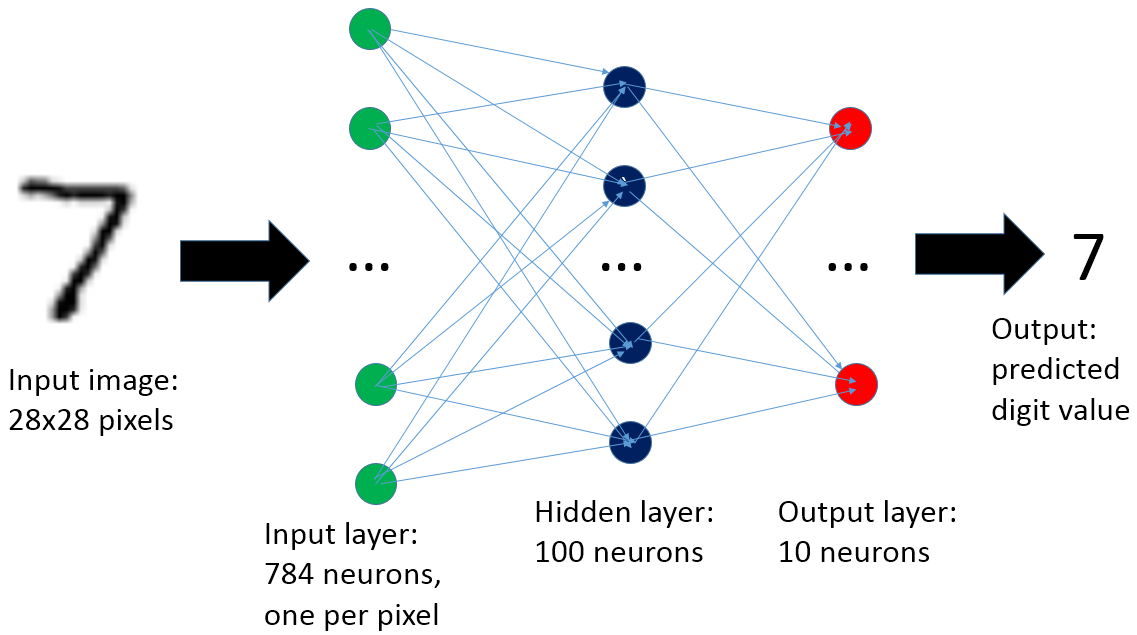
<br>

dont worry about no of neurons in hidden layers , it's just kind of trail and error , you gotta select appropriate value for this hyperparameter<br>

In [ ]:
model =keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=15)

In [ ]:
## accuracy score of 99.76% shows model's preformance on traing data
#evaluate the model for testing dataset
model.evaluate(x_test,y_test)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');

In [ ]:
#let's make a few sample prediction
def sample(i):
    print("actual label ", y_test[i])
    print("predicted label ", np.argmax(y_pred[i]))
    print("The corrosponding image")
    plt.imshow(x_test[i].reshape(28,28))


In [ ]:
sample(5)

## Recap <br>
step 1 we loaded both of our datasets.<br>
step 2 we perform some data wrangling like dimesility correction and handling missing values.<br>
step 3 we explored data and tried to look for any biasness or trend. <br> 
step 4 processed data for modeling ,converted it into x_train,x_test,y_train,y_test.<br>
step 5 Thought of model structure.<br> 
step 6 Tested the performance of model on given test data and **congrats we got accracy of 97%**.<br>

Thank you
